https://segmentmeifyoucan.com/datasets

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from huggingface_hub import login
from google.colab import userdata

login(token=userdata.get('HF_TOKEN'))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


###**RoadObstacle21**

Obstacle track: obstacle segmentation with the road as region of interest

- 327 test images with pixel-level annotations of resolution 1920x1080
- 30 extra images published with pixel-level annotations
- the obstacles in this dataset can be understood as anomaly objects as well
- object types: e.g. stuffed toys, sleighs, tree stumps, ...
- obstacles appear at different distances (one distance per image)
- different road surfaces, lighting and weather conditions available

In [5]:
!mkdir datasets

In [48]:
!mkdir datasets/obstacles

mkdir: cannot create directory ‘datasets/obstacles’: File exists


In [8]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/Master\ Thesis/Data/obstacles/validation /content/datasets/obstacles

In [9]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/Master\ Thesis/Data/obstacles/labels_masks /content/datasets/obstacles

In [23]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_obstacles_dataset_dict(data_root):
    dataset_dict = {"image": [], "mask": [], "image_name": []}


    image_dir = os.path.join(data_root, "validation")
    annotation_dir = os.path.join(data_root, "labels_masks")

     # Iterate
    for ann_file in os.listdir(annotation_dir):
        if not ann_file.endswith("color.png"):
            annotation_path = os.path.join(annotation_dir, ann_file)
            image_name = os.path.splitext(ann_file)[0]
            image_name = image_name.replace("_labels_semantic", "")

            # images
            image_path = os.path.join(image_dir, image_name + ".webp")

            # print(image_name)
            # print(annotation_path, image_path)
            # print(f"\n")

            # creating the dict
            dataset_dict["image"].append(image_path)
            dataset_dict["mask"].append(annotation_path)
            dataset_dict["image_name"].append(image_name)

    # Sorting based on image_name to ensure consistency
    sorted_indices = np.argsort(dataset_dict["image_name"])
    for key in dataset_dict.keys():
        dataset_dict[key] = [dataset_dict[key][i] for i in sorted_indices]

    return dataset_dict


# Create DatasetDict for lostandfound
data_root = "/content/datasets/obstacles"
obstacles_dataset_dict = create_obstacles_dataset_dict(data_root)

print(obstacles_dataset_dict.keys())

def create_dataset(image_paths, mask_paths, image_names):
    dataset = Dataset.from_dict({"image": image_paths,
                                 "mask": mask_paths,
                                 "image_name": image_names
                                })
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("mask", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v)] for k, v in obstacles_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"], train_dict["mask"], train_dict["image_name"])

dataset = DatasetDict({"data": train_dataset})

dict_keys(['image', 'mask', 'image_name'])


In [24]:
dataset

DatasetDict({
    data: Dataset({
        features: ['image', 'mask', 'image_name'],
        num_rows: 30
    })
})

In [30]:
dataset["data"].features

{'image': Image(mode=None, decode=True, id=None),
 'mask': Image(mode=None, decode=True, id=None),
 'image_name': Value(dtype='string', id=None)}

In [26]:
train_dict['image']

['/content/datasets/obstacles/validation/validation_1.webp',
 '/content/datasets/obstacles/validation/validation_10.webp',
 '/content/datasets/obstacles/validation/validation_11.webp',
 '/content/datasets/obstacles/validation/validation_12.webp',
 '/content/datasets/obstacles/validation/validation_13.webp',
 '/content/datasets/obstacles/validation/validation_14.webp',
 '/content/datasets/obstacles/validation/validation_15.webp',
 '/content/datasets/obstacles/validation/validation_16.webp',
 '/content/datasets/obstacles/validation/validation_17.webp',
 '/content/datasets/obstacles/validation/validation_18.webp',
 '/content/datasets/obstacles/validation/validation_2.webp',
 '/content/datasets/obstacles/validation/validation_20.webp',
 '/content/datasets/obstacles/validation/validation_3.webp',
 '/content/datasets/obstacles/validation/validation_30.webp',
 '/content/datasets/obstacles/validation/validation_31.webp',
 '/content/datasets/obstacles/validation/validation_32.webp',
 '/content/

In [28]:
train_dict['mask']

['/content/datasets/obstacles/labels_masks/validation_1_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_10_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_11_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_12_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_13_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_14_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_15_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_16_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_17_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_18_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_2_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_20_labels_semantic.png',
 '/content/datasets/obstacles/labels_masks/validation_

In [29]:
train_dict['image_name']

['validation_1',
 'validation_10',
 'validation_11',
 'validation_12',
 'validation_13',
 'validation_14',
 'validation_15',
 'validation_16',
 'validation_17',
 'validation_18',
 'validation_2',
 'validation_20',
 'validation_3',
 'validation_30',
 'validation_31',
 'validation_32',
 'validation_33',
 'validation_34',
 'validation_35',
 'validation_36',
 'validation_37',
 'validation_38',
 'validation_39',
 'validation_4',
 'validation_40',
 'validation_5',
 'validation_6',
 'validation_7',
 'validation_8',
 'validation_9']

In [31]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/obstacles_track", private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/30 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/obstacles_track/commit/4abdb02844d549c0d2e81e27667fee130e0ad6ba', commit_message='Upload dataset', commit_description='', oid='4abdb02844d549c0d2e81e27667fee130e0ad6ba', pr_url=None, pr_revision=None, pr_num=None)

In [33]:
import datasets, transformers
from datasets import load_dataset

obstacles = load_dataset("BhavanaMalla/obstacles_track", split="data")

In [34]:
obstacles

Dataset({
    features: ['image', 'mask', 'image_name'],
    num_rows: 30
})

In [35]:
import numpy as np
unique_list = []
for i in range(30):
    unique_list.extend(np.unique(np.array(obstacles[i]["mask"])).tolist())

set(unique_list)

{0, 1, 255}

In [37]:
obstacles["image_name"]

['validation_1',
 'validation_10',
 'validation_11',
 'validation_12',
 'validation_13',
 'validation_14',
 'validation_15',
 'validation_16',
 'validation_17',
 'validation_18',
 'validation_2',
 'validation_20',
 'validation_3',
 'validation_30',
 'validation_31',
 'validation_32',
 'validation_33',
 'validation_34',
 'validation_35',
 'validation_36',
 'validation_37',
 'validation_38',
 'validation_39',
 'validation_4',
 'validation_40',
 'validation_5',
 'validation_6',
 'validation_7',
 'validation_8',
 'validation_9']

In [45]:
import numpy as np
unique_list = []
for i in range(30):
    unique_list.append(np.array(obstacles[i]["mask"]).shape)

unique_list

[(1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920),
 (1080, 1920)]

In [46]:
import numpy as np
unique_list = []

for i in range(30):
    unique_list.append(np.array(obstacles[i]["image"]).shape)

unique_list

[(1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3),
 (1080, 1920, 3)]

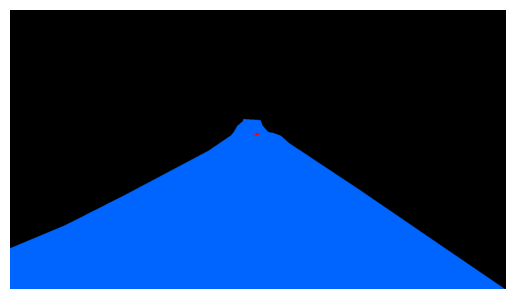

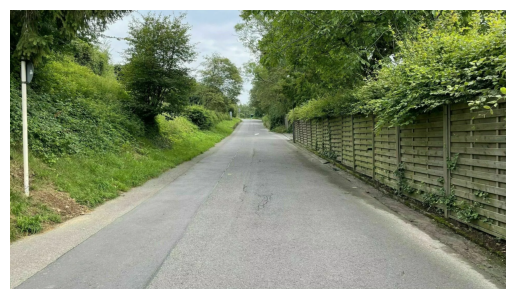

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap for visualization (you can customize as needed)
label_colors = {
    0: [0, 100, 255],    # ID (Blue)
    1: [255, 0, 0],      # OOD (red)
    255: [0, 0, 0]       # Background (black)
}

# Convert integer labels to RGB colors
mask = np.array(obstacles["mask"][0])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(obstacles["image"][0])
plt.imshow(image)
plt.axis('off')
plt.show()

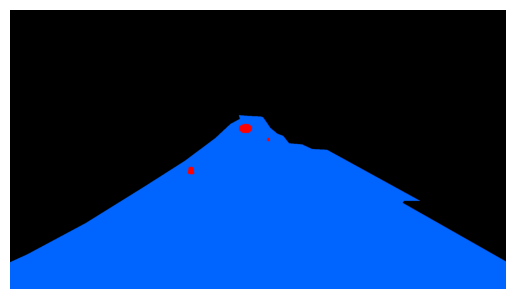

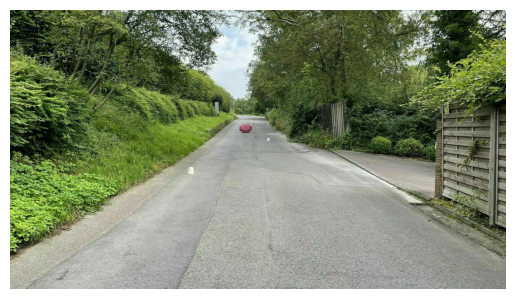

In [40]:
# Convert integer labels to RGB colors
mask = np.array(obstacles["mask"][1])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(obstacles["image"][1])
plt.imshow(image)
plt.axis('off')
plt.show()

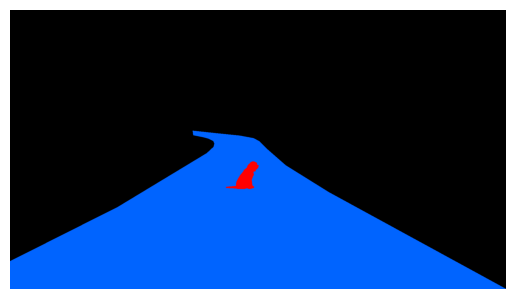

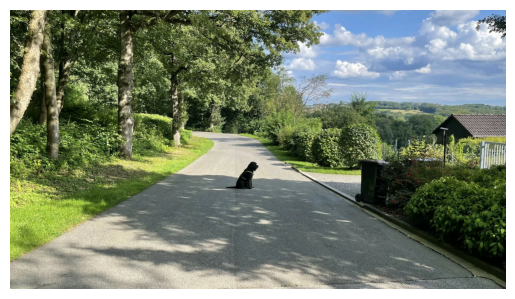

In [43]:
# Convert integer labels to RGB colors
mask = np.array(obstacles["mask"][20])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(obstacles["image"][20])
plt.imshow(image)
plt.axis('off')
plt.show()

###**RoadAnomaly21**
Anomaly track: general anomaly segmentation in full street scenes

- 100 test images with pixel-level annotations of resolution 2048x1024 and 1280x720
- 10 extra images published with pixel-level annotations
- at least one anomalous object per image, e.g. animals and unknown vehicles
- anomalies can appear anywhere in the image
- anomalies widely differ in size (from 0.5% to 40% of the image)
- images were collected from web resources and therefore depict a wide variety of environments

###**Labeling policy**
The pixel-level annotations of both datasets include three classes:

- anomaly / obstacle
- not anomaly / not obstacle
- void

The 19 evaluation classes from Cityscapes serve as basis to judge whether an object is anomalous or not. We assign image regions to the void class if they cannot be assigned to any of the Cityscapes classes and also do not belong to the objects / regions of interest, i.e. they are neither anomaly nor obstacle.

In [49]:
!mkdir datasets/anamoly

In [50]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/Master\ Thesis/Data/anamoly/validation /content/datasets/anamoly

In [51]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/Master\ Thesis/Data/anamoly/labels_masks /content/datasets/anamoly

In [52]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_obstacles_dataset_dict(data_root):
    dataset_dict = {"image": [], "mask": [], "image_name": []}


    image_dir = os.path.join(data_root, "validation")
    annotation_dir = os.path.join(data_root, "labels_masks")

     # Iterate
    for ann_file in os.listdir(annotation_dir):
        if not ann_file.endswith("color.png"):
            annotation_path = os.path.join(annotation_dir, ann_file)
            image_name = os.path.splitext(ann_file)[0]
            image_name = image_name.replace("_labels_semantic", "")

            # images
            image_path = os.path.join(image_dir, image_name + ".jpg")

            # print(image_name)
            # print(annotation_path, image_path)
            # print(f"\n")

            # creating the dict
            dataset_dict["image"].append(image_path)
            dataset_dict["mask"].append(annotation_path)
            dataset_dict["image_name"].append(image_name)

    # Sorting based on image_name to ensure consistency
    sorted_indices = np.argsort(dataset_dict["image_name"])
    for key in dataset_dict.keys():
        dataset_dict[key] = [dataset_dict[key][i] for i in sorted_indices]
    return dataset_dict


# Create DatasetDict for lostandfound
data_root = "/content/datasets/anamoly"
obstacles_dataset_dict = create_obstacles_dataset_dict(data_root)

print(obstacles_dataset_dict.keys())

def create_dataset(image_paths, mask_paths, image_names):
    dataset = Dataset.from_dict({"image": image_paths,
                                 "mask": mask_paths,
                                 "image_name": image_names
                                })
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("mask", Image())
    return dataset


train_dict = {k: [x for i, x in enumerate(v)] for k, v in obstacles_dataset_dict.items()}
train_dataset = create_dataset(train_dict["image"], train_dict["mask"], train_dict["image_name"])

dataset = DatasetDict({"data": train_dataset})

dict_keys(['image', 'mask', 'image_name'])


In [53]:
dataset

DatasetDict({
    data: Dataset({
        features: ['image', 'mask', 'image_name'],
        num_rows: 10
    })
})

In [54]:
dataset["data"].features

{'image': Image(mode=None, decode=True, id=None),
 'mask': Image(mode=None, decode=True, id=None),
 'image_name': Value(dtype='string', id=None)}

In [55]:
train_dict['image']

['/content/datasets/anamoly/validation/validation0000.jpg',
 '/content/datasets/anamoly/validation/validation0001.jpg',
 '/content/datasets/anamoly/validation/validation0002.jpg',
 '/content/datasets/anamoly/validation/validation0003.jpg',
 '/content/datasets/anamoly/validation/validation0004.jpg',
 '/content/datasets/anamoly/validation/validation0005.jpg',
 '/content/datasets/anamoly/validation/validation0006.jpg',
 '/content/datasets/anamoly/validation/validation0007.jpg',
 '/content/datasets/anamoly/validation/validation0008.jpg',
 '/content/datasets/anamoly/validation/validation0009.jpg']

In [56]:
train_dict['mask']

['/content/datasets/anamoly/labels_masks/validation0000_labels_semantic.png',
 '/content/datasets/anamoly/labels_masks/validation0001_labels_semantic.png',
 '/content/datasets/anamoly/labels_masks/validation0002_labels_semantic.png',
 '/content/datasets/anamoly/labels_masks/validation0003_labels_semantic.png',
 '/content/datasets/anamoly/labels_masks/validation0004_labels_semantic.png',
 '/content/datasets/anamoly/labels_masks/validation0005_labels_semantic.png',
 '/content/datasets/anamoly/labels_masks/validation0006_labels_semantic.png',
 '/content/datasets/anamoly/labels_masks/validation0007_labels_semantic.png',
 '/content/datasets/anamoly/labels_masks/validation0008_labels_semantic.png',
 '/content/datasets/anamoly/labels_masks/validation0009_labels_semantic.png']

In [57]:
train_dict['image_name']

['validation0000',
 'validation0001',
 'validation0002',
 'validation0003',
 'validation0004',
 'validation0005',
 'validation0006',
 'validation0007',
 'validation0008',
 'validation0009']

In [58]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/anamoly_track", private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/anamoly_track/commit/eeedaf772c9b90abdc8e004b762849c3ce1c793c', commit_message='Upload dataset', commit_description='', oid='eeedaf772c9b90abdc8e004b762849c3ce1c793c', pr_url=None, pr_revision=None, pr_num=None)

In [59]:
import datasets, transformers
from datasets import load_dataset

anamoly = load_dataset("BhavanaMalla/anamoly_track", split="data")

Generating data split:   0%|          | 0/10 [00:00<?, ? examples/s]

In [60]:
anamoly

Dataset({
    features: ['image', 'mask', 'image_name'],
    num_rows: 10
})

In [61]:
import numpy as np
unique_list = []
for i in range(10):
    unique_list.extend(np.unique(np.array(anamoly[i]["mask"])).tolist())

set(unique_list)

{0, 1, 255}

In [62]:
anamoly["image_name"]

['validation0000',
 'validation0001',
 'validation0002',
 'validation0003',
 'validation0004',
 'validation0005',
 'validation0006',
 'validation0007',
 'validation0008',
 'validation0009']

In [64]:
import numpy as np
unique_list = []
for i in range(10):
    unique_list.append(np.array(anamoly[i]["mask"]).shape)

unique_list

[(720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280)]

In [66]:
import numpy as np
unique_list = []

for i in range(10):
    unique_list.append(np.array(anamoly[i]["image"]).shape)

unique_list

[(720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3),
 (720, 1280, 3)]

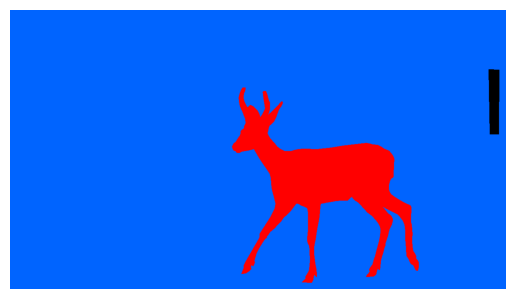

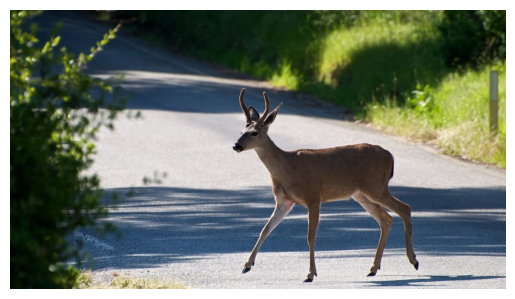

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap for visualization (you can customize as needed)
label_colors = {
    0: [0, 100, 255],    # ID (Blue)
    1: [255, 0, 0],      # OOD (red)
    255: [0, 0, 0]       # Background (black)
}

# Convert integer labels to RGB colors
mask = np.array(anamoly["mask"][0])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(anamoly["image"][0])
plt.imshow(image)
plt.axis('off')
plt.show()

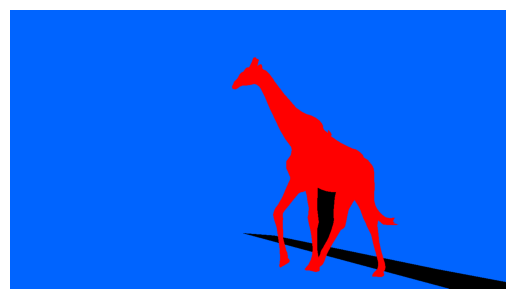

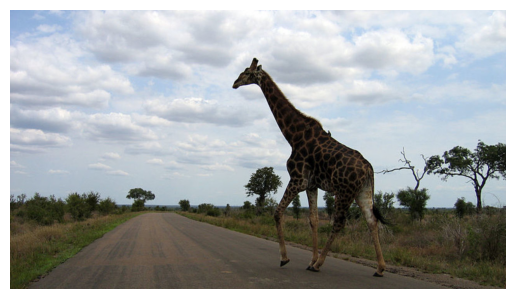

In [69]:
# Convert integer labels to RGB colors
mask = np.array(anamoly["mask"][1])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(anamoly["image"][1])
plt.imshow(image)
plt.axis('off')
plt.show()

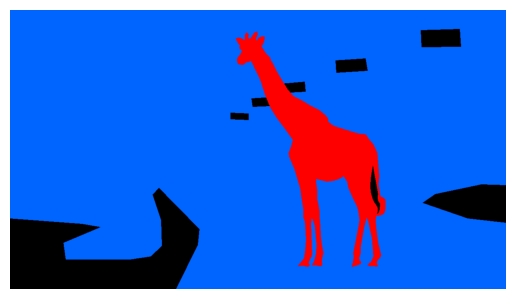

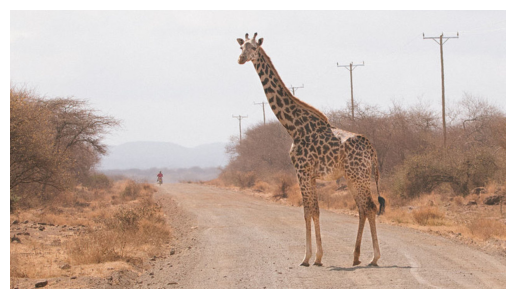

In [70]:
# Convert integer labels to RGB colors
mask = np.array(anamoly["mask"][2])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(anamoly["image"][2])
plt.imshow(image)
plt.axis('off')
plt.show()

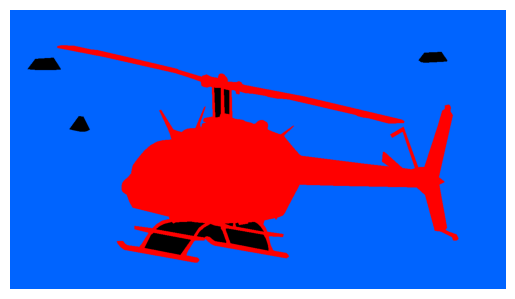

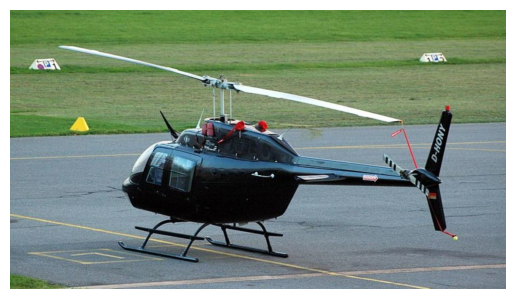

In [71]:
# Convert integer labels to RGB colors
mask = np.array(anamoly["mask"][3])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(anamoly["image"][3])
plt.imshow(image)
plt.axis('off')
plt.show()

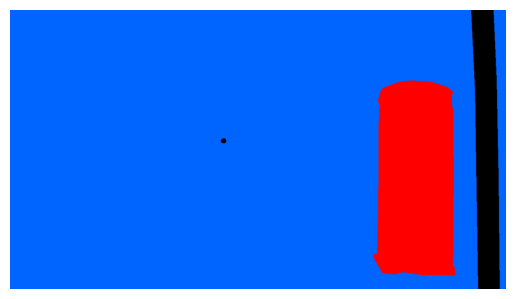

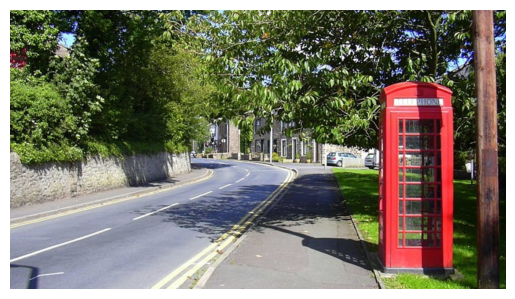

In [72]:
# Convert integer labels to RGB colors
mask = np.array(anamoly["mask"][5])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(anamoly["image"][5])
plt.imshow(image)
plt.axis('off')
plt.show()